## Check mass (water and tracer) conservation of the configuration

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [151]:
#Base case no canyon:
grid_NoC = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc')
state_NoC = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc')
ptracer_NoC = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc')


#Base case canyon:
grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
state = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc')   

### Calculate water transport through boundaries

Weird, at yind=360 V mimics exactly the southern boundary (yind = 0), ignoring where there is land. This balances out the model perfectly. Otherwise, I get a gain of water that incresases with time to up to 350 m^3s^-1 by day 19 coming from southern boundary. What the hell?


In [173]:
# Boundary positions

Nx = slice(0,360)
Ny = 358           

Sx = slice(0,360)
Sy = 0

Wx = 0
Wy = slice(0,358)

Ex = 360
Ey = slice(0,358)

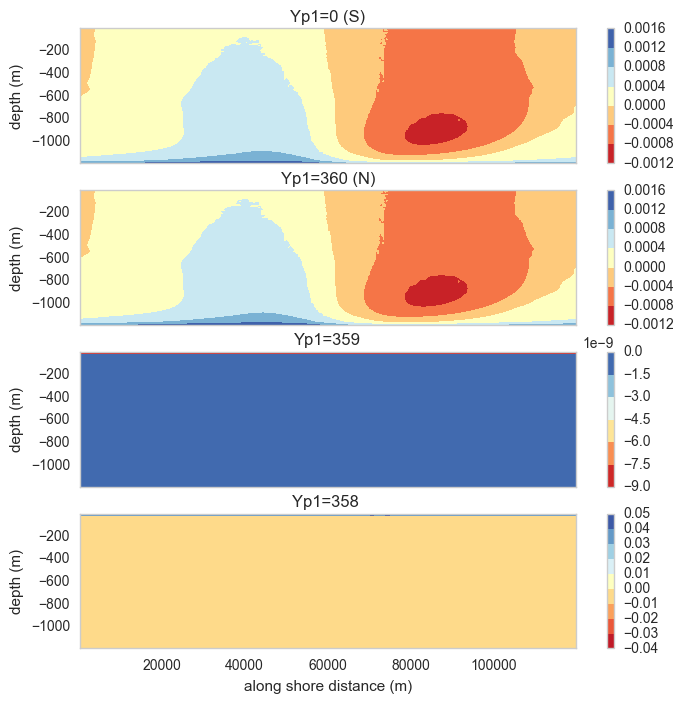

In [174]:
fig,ax = plt.subplots(4,1,figsize=(8,8),sharex=True)
                      
cn1 = ax[0].contourf(grid_NoC.X,grid_NoC.Z,state_NoC.V.isel(Yp1=0,X=Nx,T=8),cmap = 'RdYlBu')
plt.colorbar(cn1,ax=ax[0])
cn2 = ax[1].contourf(grid_NoC.X,grid_NoC.Z,state_NoC.V.isel(Yp1=360,X=Nx,T=8),cmap = 'RdYlBu')
plt.colorbar(cn2,ax=ax[1])
cn3 = ax[2].contourf(grid_NoC.X,grid_NoC.Z,state_NoC.V.isel(Yp1=359,X=Nx,T=8),cmap = 'RdYlBu')
plt.colorbar(cn3,ax=ax[2])
cn4 = ax[3].contourf(grid_NoC.X,grid_NoC.Z,state_NoC.V.isel(Yp1=358,X=Nx,T=8),cmap = 'RdYlBu')
plt.colorbar(cn4,ax=ax[3])

ax[3].set_xlabel('along shore distance (m)')
ax[0].set_ylabel('depth (m)')
ax[1].set_ylabel('depth (m)')
ax[2].set_ylabel('depth (m)')
ax[3].set_ylabel('depth (m)')

ax[0].set_title('Yp1=0 (S)')
ax[1].set_title('Yp1=360 (N)')
ax[2].set_title('Yp1=359')
ax[3].set_title('Yp1=358 ')


In [176]:
unstagN = state_NoC.V.isel(Yp1=Ny,X=Nx)
N_trans = ((unstagN*grid_NoC.dxF.isel(Y=Ny,X=Nx)*grid_NoC.drF).sum(dim='Z')).sum(dim='X')

unstagS = state_NoC.V.isel(Yp1=Sy,X=Sx)
S_trans = ((unstagS*grid_NoC.dxF.isel(Y=Sy,X=Sx)*grid_NoC.drF).sum(dim='Z')).sum(dim='X')

unstagW = state_NoC.U.isel(Y=Wy,Xp1=Wx)
W_trans = ((unstagW*grid_NoC.dyF.isel(Y=Wy,X=Wx)*grid_NoC.drF).sum(dim='Z')).sum(dim='Y')

unstagE = state_NoC.U.isel(Y=Ey,Xp1=Ex)
E_trans = ((unstagE*grid_NoC.dyF.isel(Y=Ey,X=Ex-1)*grid_NoC.drF).sum(dim='Z')).sum(dim='Y')


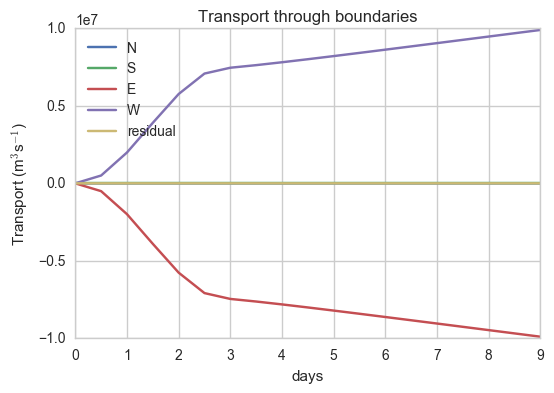

In [177]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2.0,-N_trans,label='N')
ax.plot(np.arange(19)/2.0,S_trans,label='S')
ax.plot(np.arange(19)/2.0,-E_trans,label='E')
ax.plot(np.arange(19)/2.0,W_trans,label='W')
ax.plot(np.arange(19)/2.0,(W_trans-E_trans+S_trans-N_trans),label='residual')

ax.set_title('Transport through boundaries')
ax.set_xlabel('days')
ax.set_ylabel('Transport (m$^3$s$^{-1}$)')
ax.legend(loc=0)



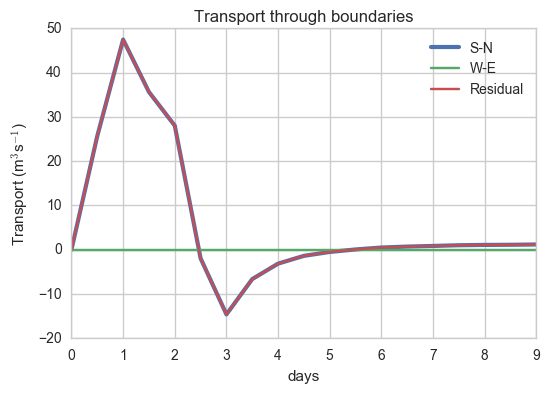

In [178]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2.0,S_trans-N_trans,label='S-N',linewidth=3)
ax.plot(np.arange(19)/2.0,W_trans-E_trans,label='W-E')
ax.plot(np.arange(19)/2.0,W_trans-E_trans+S_trans-N_trans,label='Residual')

ax.set_title('Transport through boundaries')
ax.set_xlabel('days')
ax.set_ylabel('Transport (m$^3$s$^{-1}$)')
ax.legend(loc=0)


Periodic boundaries are well balanced, of course. Open boundaries drift and the system gains a little bit of mass...

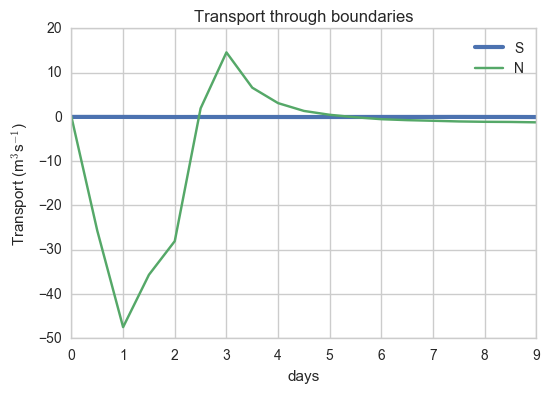

In [179]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2.0,S_trans,label='S',linewidth=3)
ax.plot(np.arange(19)/2.0,N_trans,label='N')

ax.set_title('Transport through boundaries')
ax.set_xlabel('days')
ax.set_ylabel('Transport (m$^3$s$^{-1}$)')
ax.legend(loc=0)


### Tracer transport through boundaries

In [183]:
unstagN = state_NoC.V.isel(Yp1=Ny,X=Nx)
TrN = ptracer_NoC.Tr1.isel(Y=Ny,X=Nx)
N_trans_tr = ((unstagN*TrN*grid_NoC.dxF.isel(Y=Ny,X=Nx)*grid_NoC.drF).sum(dim='Z')).sum(dim='X')

unstagS = state_NoC.V.isel(Yp1=Sy,X=Sx)
TrS = ptracer_NoC.Tr1.isel(Y=Sy,X=Sx)
S_trans_tr = ((unstagS*TrS*grid_NoC.dxF.isel(Y=Sy,X=Sx)*grid_NoC.drF).sum(dim='Z')).sum(dim='X')

unstagW = state_NoC.U.isel(Y=Wy,Xp1=Wx)
TrW = ptracer_NoC.Tr1.isel(Y=Wy,X=Wx)
W_trans_tr = ((unstagW*TrW*grid_NoC.dyF.isel(Y=Wy,X=Wx)*grid_NoC.drF).sum(dim='Z')).sum(dim='Y')

unstagE = state_NoC.U.isel(Y=Ey,Xp1=Ex)
TrE = ptracer_NoC.Tr1.isel(Y=Ey,X=Ex-1)
E_trans_tr = ((unstagE*TrE*grid_NoC.dyF.isel(Y=Ey,X=Ex-1)*grid_NoC.drF).sum(dim='Z')).sum(dim='Y')


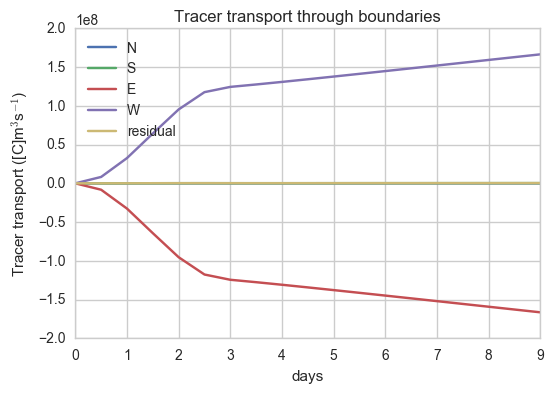

In [184]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2.0,-N_trans_tr,label='N')
ax.plot(np.arange(19)/2.0,S_trans_tr,label='S')
ax.plot(np.arange(19)/2.0,-E_trans_tr,label='E')
ax.plot(np.arange(19)/2.0,W_trans_tr,label='W')
ax.plot(np.arange(19)/2.0,(W_trans_tr-E_trans_tr+S_trans_tr-N_trans_tr),label='residual')

ax.set_title('Tracer transport through boundaries')
ax.set_xlabel('days')
ax.set_ylabel('Tracer transport ([C]m$^3$s$^{-1}$)')
ax.legend(loc=0)



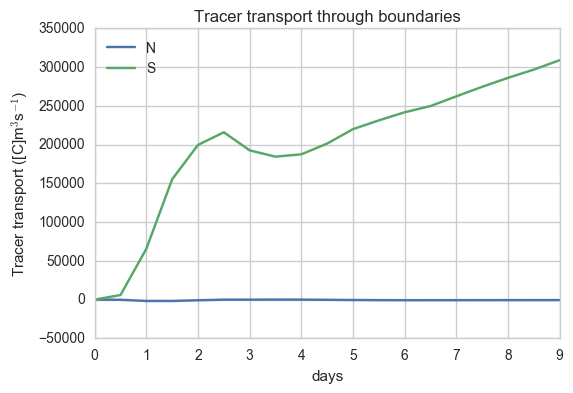

In [185]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2.0,-N_trans_tr,label='N')
ax.plot(np.arange(19)/2.0,S_trans_tr,label='S')
#ax.plot(np.arange(19)/2.0,-E_trans_tr,label='E')
#ax.plot(np.arange(19)/2.0,W_trans_tr,label='W')

ax.set_title('Tracer transport through boundaries')
ax.set_xlabel('days')
ax.set_ylabel('Tracer transport ([C]m$^3$s$^{-1}$)')
ax.legend(loc=0)
